# ****SALARY PREDICTION USING ML****

## Importing Libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [83]:
my_data=pd.read_csv("adult.csv")
my_data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 1)Rename the columns

### Before renaming the column names:

In [84]:
print (" The column names before renaming are :\n",my_data.columns)

 The column names before renaming are :
 Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


### After renaming the column names:

In [85]:
my_data.columns = ['Age','Workclass','Fnlwgt','Education','edcation_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
print("The column names after renaming are :\n",my_data.columns)

The column names after renaming are :
 Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'edcation_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [86]:
my_data.head()

,Age,Workclass,Fnlwgt,Education,edcation_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [87]:
my_data.shape

(32560, 15)

## 2)Remove null values(if any)

In [88]:
my_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
edcation_num      0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### No null values

### Datatypes in the dataset

In [89]:
my_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
edcation_num       int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Changing the datatypes

In [90]:
my_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [91]:
my_data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [92]:
my_data['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [93]:
my_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
my_data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [95]:
my_data['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [96]:
my_data['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [97]:
my_data['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [98]:
my_data['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
my_data['Workclass'] = le.fit_transform(my_data['Workclass'])
my_data['Education'] = le.fit_transform(my_data['Education'])
my_data['marital_status'] = le.fit_transform(my_data['marital_status'])
my_data['occupation'] = le.fit_transform(my_data['occupation'])
my_data['relationship'] = le.fit_transform(my_data['relationship'])
my_data['race'] = le.fit_transform(my_data['race'])
my_data['sex'] = le.fit_transform(my_data['sex'])
my_data['native_country'] = le.fit_transform(my_data['native_country'])
my_data['income'] = le.fit_transform(my_data['income'])

my_data.head()

,Age,Workclass,Fnlwgt,Education,edcation_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [100]:
my_data.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
edcation_num      int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

### Correlation

In [101]:
my_data.corr()

,Age,Workclass,Fnlwgt,Education,edcation_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
edcation_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


## 3)Split data into Training and Test data

In [102]:
x=my_data.drop(['income'],axis='columns')
y=my_data.income.values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [103]:
x_train.shape

(26048, 14)

In [104]:
x_test.shape

(6512, 14)

In [105]:
y_train.shape

(26048,)

In [106]:
y_test.shape

(6512,)

## 4)Apply the following models on the training dataset and generate the predicted value for the test dataset

### a.Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
M1=DecisionTreeClassifier()
M1.fit(x_train,y_train)
print("Decisionn Tree Classification Score is " ,M1.score(x_test,y_test))
prediction1=M1.predict(x_test)


Decisionn Tree Classification Score is  0.8114250614250614


### b.Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
M2=RandomForestClassifier()
M2.fit(x_train,y_train)
print("Random Forest Classfier Score is ",M2.score(x_test,y_test))
prediction2=M2.predict(x_test)

Random Forest Classfier Score is  0.8571867321867321


### c.Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
M3= LogisticRegression(max_iter=1000)
M3.fit(x_train,y_train)
print("Logistic Regression Classification Score is ",M3.score(x_test,y_test))
prediction3=M3.predict(x_test)


Logistic Regression Classification Score is  0.8069717444717445


### d.KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
M4=KNeighborsClassifier()
M4.fit(x_train,y_train)
print("KNeighbors Classification Score is ",M4.score(x_test,y_test))
prediction4=M4.predict(x_test)

KNeighbors Classification Score is  0.7733415233415234


### e.SVC Classifier(linear kernel)

In [111]:
from sklearn.svm import LinearSVC
M5=LinearSVC()
M5.fit(x_train,y_train)
print("Linear SVM Classification Score is ",M5.score(x_test,y_test))
prediction5=M5.predict(x_test)

Linear SVM Classification Score is  0.7753378378378378


## 5)Predict the Income for Test data

In [112]:
print("The prediction for Decision Tree is ",prediction1)

The prediction for Decision Tree is  [0 1 0 ... 0 0 0]


In [113]:
print("The prediction for Random Forest Classifier is ",prediction2)

The prediction for Random Forest Classifier is  [0 1 0 ... 0 0 0]


In [114]:
print("The prediction for Logistic Regression is ",prediction3)

The prediction for Logistic Regression is  [0 0 0 ... 0 0 0]


In [115]:
print("The prediction for KNN Classifier is ",prediction4)

The prediction for KNN Classifier is  [0 0 0 ... 0 0 0]


In [116]:
print("The prediction for SVC Classifier (with linear kernal) is ",prediction5)

The prediction for SVC Classifier (with linear kernal) is  [0 0 0 ... 0 0 0]


## 6)Compute Confusion matrix and Classification report for each of these models.

In [117]:
from sklearn.metrics import confusion_matrix,classification_report

In [118]:
def eval_metrics(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [119]:
print("Confusion matrix and classification report for Decision Tree is \n")
eval_metrics(y_test,prediction1)

Confusion matrix and classification report for Decision Tree is 

[[4315  622]
 [ 606  969]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4937
           1       0.61      0.62      0.61      1575

    accuracy                           0.81      6512
   macro avg       0.74      0.74      0.74      6512
weighted avg       0.81      0.81      0.81      6512



In [120]:
print("Confusion matrix and classification report for Random Forest Classifier is \n")
eval_metrics(y_test,prediction2)

Confusion matrix and classification report for Random Forest Classifier is 

[[4596  341]
 [ 589  986]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4937
           1       0.74      0.63      0.68      1575

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [121]:
print("Confusion matrix and classification report for Logistic Regression  is \n")
eval_metrics(y_test,prediction3)

Confusion matrix and classification report for Logistic Regression  is 

[[4694  243]
 [1014  561]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4937
           1       0.70      0.36      0.47      1575

    accuracy                           0.81      6512
   macro avg       0.76      0.65      0.68      6512
weighted avg       0.79      0.81      0.78      6512



In [122]:
print("Confusion matrix and classification report for KNN Classifier is \n")
eval_metrics(y_test,prediction4)

Confusion matrix and classification report for KNN Classifier is 

[[4533  404]
 [1072  503]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4937
           1       0.55      0.32      0.41      1575

    accuracy                           0.77      6512
   macro avg       0.68      0.62      0.63      6512
weighted avg       0.75      0.77      0.75      6512



In [123]:
print("Confusion matrix and classification report for SVC Classifier (with linear kernel) is \n")
eval_metrics(y_test,prediction5)

Confusion matrix and classification report for SVC Classifier (with linear kernel) is 

[[4931    6]
 [1457  118]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4937
           1       0.95      0.07      0.14      1575

    accuracy                           0.78      6512
   macro avg       0.86      0.54      0.50      6512
weighted avg       0.82      0.78      0.69      6512



## 7)Validate the result for Precision,Recall,F1-Score and Accuracy for each model based on values.

In [124]:
print("The Validation of reesult for Precision, Recall, F1-score and Accuracy for Decision Tree")

print("\nwhen 0")
Precision_0=4266/(4266+599)
Recall_0=4266/(4266+662)
F1_Score_0=(2*Precision_0*Recall_0)/(Precision_0+Recall_0)
print("Precision for 0 is ",Precision_0)
print("Recall for 0 is ",Recall_0)
print("F1_Score for 0 is ",F1_Score_0)
print("\nwhen 1")
Precision_1=985/(985+662)
Recall_1=985/(985+599)
F1_Score_1=(2*Precision_1*Recall_1)/(Precision_1+Recall_1)
print("Precision for 1 is ",Precision_1)
print("Recall for 1 is ",Recall_1)
print("F1_Score for 1 is ",F1_Score_1)
Accuracy=(4266+985)/(4266+985+662+599)
print("\nAccuracy for the Decision Tree Model is ",Accuracy)

The Validation of reesult for Precision, Recall, F1-score and Accuracy for Decision Tree

when 0
Precision for 0 is  0.8768756423432682
Recall for 0 is  0.8656655844155844
F1_Score for 0 is  0.871234555294598

when 1
Precision for 1 is  0.5980570734669095
Recall for 1 is  0.6218434343434344
F1_Score for 1 is  0.6097183534509439

Accuracy for the Decision Tree Model is  0.8063574938574939


## 8) Generate the percentage of misclassification in each of these models.

In [125]:
mis_classification_1=(599+622)/(4266+662+599+985)
print("The percentage of misclassification in Decision Tree model is",mis_classification_1)

The percentage of misclassification in Decision Tree model is 0.1875


In [126]:
mis_classification_2=(608+318)/(4610+318+608+976)
print("The percentage of misclassification in Random Forest Classifier model is",mis_classification_2)

The percentage of misclassification in Random Forest Classifier model is 0.1421990171990172


In [127]:
mis_classification_3=(1154+157)/(4771+157+1154+430)
print("The percentage of misclassification in Logistic Regression model is",mis_classification_3)

The percentage of misclassification in Logistic Regression model is 0.20132063882063883


In [128]:
mis_classification_4=(1088+395)/(4533+395+1088+496)
print("The percentage of misclassification inKNN Classifier model is",mis_classification_4)

The percentage of misclassification inKNN Classifier model is 0.22773341523341523


In [129]:
mis_classification_5=(1584+0)/(4928+0+0+1584)
print("The percentage of misclassification in SVC Classifier (with linear kernel) model is",mis_classification_5)

The percentage of misclassification in SVC Classifier (with linear kernel) model is 0.24324324324324326


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

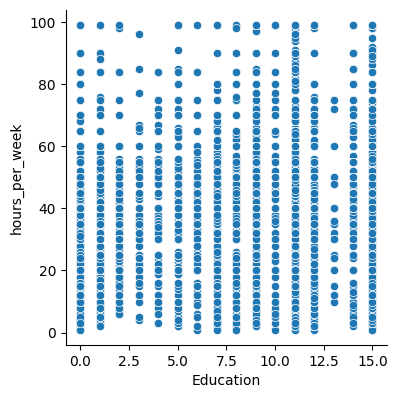

In [146]:
sns.pairplot(my_data,x_vars=['Education'],y_vars='hours_per_week',size=4,aspect=1,kind='scatter')


## 9) Report the model with the best accuracy.

### The model with best Accuracy is Random Forest Classifier Model

In [130]:
def mscore(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))

In [131]:
mscore(M1)

Training Score 0.9999616093366094
Testing Score 0.8114250614250614


In [132]:
mscore(M2)

Training Score 0.9999232186732187
Testing Score 0.8571867321867321


In [133]:
mscore(M3)

Training Score 0.8014050982800983
Testing Score 0.8069717444717445


In [134]:
mscore(M4)

Training Score 0.8333461302211302
Testing Score 0.7733415233415234


In [135]:
mscore(M5)

Training Score 0.7797143734643734
Testing Score 0.7753378378378378


## CONCLUSION

### The classification model to predict whether a person makes over 50k dollars a year is created.

### According to my claculations,the model with best Accuracy is Random Forest Classifier Model.